## Importing all the required libraries

In [1]:
#Importing all the required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sklearn
import sklearn.preprocessing
import tensorflow.compat.v1 as tf
import plotly.graph_objects as go
import plotly.express as px
import re
import warnings
warnings.filterwarnings("ignore")

## Loading required datasets for New York Stock Exchange

In [2]:
# Loading the datasets
stock_price_df = pd.read_csv(r'prices-split-adjusted.csv')
securities_data = pd.read_csv(r'securities.csv')

In [3]:
# Displaying the stock price dataset
stock_price_df.head()

date symbol        open       close         low        high   volume
0   5/1/2016   WLTW  123.430000  125.839996  122.309998  126.250000  2163600
1   6/1/2016   WLTW  125.239998  119.980003  119.940002  125.540001  2386400
2   7/1/2016   WLTW  116.379997  114.949997  114.930000  119.739998  2489500
3   8/1/2016   WLTW  115.480003  116.620003  113.500000  117.440002  2006300
4  11/1/2016   WLTW  117.010002  114.970001  114.089996  117.330002  1408600

In [4]:
# Displaying the securities dataset
securities_data.head()

Ticker symbol             Security SEC filings             GICS Sector  \
0           MMM           3M Company     reports             Industrials   
1           ABT  Abbott Laboratories     reports             Health Care   
2          ABBV               AbbVie     reports             Health Care   
3           ACN        Accenture plc     reports  Information Technology   
4          ATVI  Activision Blizzard     reports  Information Technology   

                GICS Sub Industry   Address of Headquarters Date first added  \
0        Industrial Conglomerates       St. Paul, Minnesota              NaN   
1           Health Care Equipment   North Chicago, Illinois       1964-03-31   
2                 Pharmaceuticals   North Chicago, Illinois       2012-12-31   
3  IT Consulting & Other Services           Dublin, Ireland       2011-07-06   
4     Home Entertainment Software  Santa Monica, California       2015-08-31   

       CIK  
0    66740  
1     1800  
2  1551152  
3  1467373  
4   718877

## Data Cleaning

### 1. Correcting the datatype for the date column to be displayed correctly

In [5]:
data_types = stock_price_df.dtypes

# Print the data types
print(data_types)

date       object
symbol     object
open      float64
close     float64
low       float64
high      float64
volume      int64
dtype: object


In [6]:
# Converting the date column to datetime datatype format
stock_price_df['date'] = pd.to_datetime(stock_price_df['date'], errors='coerce')

In [7]:
data_types = stock_price_df.dtypes

# Print the data types
print(data_types)

date      datetime64[ns]
symbol            object
open             float64
close            float64
low              float64
high             float64
volume             int64
dtype: object


The data analysis ensures the 'date' column is correctly transformed for the specified rows, allowing for subsequent datetime related operations.
This data-cleaning step ensures that date-related analyses or visualizations can be performed accurately on the dataset. It helps maintain consistency and ensures that the 'date' column is in a format suitable for time-based operations.

### 2. Checking for missing values and handling by replacing with the mean values.

In [8]:
# Display rows with missing data
print("Rows with Missing Data:")
print(stock_price_df[stock_price_df.isnull().any(axis=1)])

Rows with Missing Data:
             date symbol   open      close        low       high   volume
6830   2010-01-25    AJG    NaN  22.820000  22.680000  23.340000   558700
25082  2010-03-22    AJG  25.50        NaN  24.920000  25.500000  2011100
41940  2010-12-05    AJG  25.42  25.459999        NaN  25.540001   508400
60700  2010-09-07    AJG  25.18        NaN  25.070000  25.370001   246100
85088  2010-09-22    AJG  26.41  26.170000        NaN  26.600000   325400
103379 2010-11-16    AJG    NaN  27.790001  27.690001  28.129999   372400
151317 2011-04-13    AJG  30.16  30.020000        NaN  30.200001   512300


In [9]:
#filling missing values using mean

# Fill missing values with the mean for the "AJG" company
grouped_means = stock_price_df[stock_price_df['symbol'] == 'AJG']['open'].mean()

# Replace null values in the specified group with the group mean
stock_price_df.loc[stock_price_df['symbol'] == 'AJG', 'open'] = stock_price_df.loc[stock_price_df['symbol'] == 'AJG', 'open'].fillna(grouped_means)

# Print the updated DataFrame
print(stock_price_df[stock_price_df.isnull().any(axis=1)])

             date symbol   open      close    low       high   volume
25082  2010-03-22    AJG  25.50        NaN  24.92  25.500000  2011100
41940  2010-12-05    AJG  25.42  25.459999    NaN  25.540001   508400
60700  2010-09-07    AJG  25.18        NaN  25.07  25.370001   246100
85088  2010-09-22    AJG  26.41  26.170000    NaN  26.600000   325400
151317 2011-04-13    AJG  30.16  30.020000    NaN  30.200001   512300


In [10]:
#filling missing values using mean

# Fill missing values with the mean for the "AJG" company
grouped_means = stock_price_df[stock_price_df['symbol'] == 'AJG']['close'].mean()

# Replace null values in the specified group with the group mean
stock_price_df.loc[stock_price_df['symbol'] == 'AJG', 'close'] = stock_price_df.loc[stock_price_df['symbol'] == 'AJG', 'close'].fillna(grouped_means)

# Print the updated DataFrame
print(stock_price_df[stock_price_df.isnull().any(axis=1)])

             date symbol   open      close  low       high  volume
41940  2010-12-05    AJG  25.42  25.459999  NaN  25.540001  508400
85088  2010-09-22    AJG  26.41  26.170000  NaN  26.600000  325400
151317 2011-04-13    AJG  30.16  30.020000  NaN  30.200001  512300


In [11]:
#filling missing values using mean

# Fill missing values with the mean for the "AJG" company
grouped_means = stock_price_df[stock_price_df['symbol'] == 'AJG']['low'].mean()

# Replace null values in the specified group with the group mean
stock_price_df.loc[stock_price_df['symbol'] == 'AJG', 'low'] = stock_price_df.loc[stock_price_df['symbol'] == 'AJG', 'low'].fillna(grouped_means)

# Print the updated DataFrame
print(stock_price_df[stock_price_df.isnull().any(axis=1)])

Empty DataFrame
Columns: [date, symbol, open, close, low, high, volume]
Index: []


### 3. Checking for duplicate data and removing unnecessary rows

In [12]:
# Identify duplicate rows
duplicate_rows = stock_price_df[stock_price_df.duplicated()]

# Count occurrences of each unique row (including duplicates)
duplicate_counts = stock_price_df.duplicated().value_counts()

# Checking actual data shape
print(stock_price_df.shape)

# Print the duplicate rows and their counts
print("Duplicate Rows:")
print(duplicate_rows)

print("\nCount of Duplicate Rows:")
print(duplicate_counts)

(851271, 7)
Duplicate Rows:
           date symbol       open      close        low       high   volume
591  2010-04-01    PLD  25.760000  25.370001  25.250000  26.030001  1169700
592  2010-04-01    PLD  25.760000  25.370001  25.250000  26.030001  1169700
593  2010-04-01    PLD  25.760000  25.370001  25.250000  26.030001  1169700
594  2010-04-01    PLD  25.760000  25.370001  25.250000  26.030001  1169700
598  2010-04-01    PNR  32.389999  33.380001  32.380001  33.720001   712500
599  2010-04-01    PNR  32.389999  33.380001  32.380001  33.720001   712500
1065 2010-05-01    PLD  25.350000  25.740000  25.110001  25.760000  1048200

Count of Duplicate Rows:
False    851264
True          7
dtype: int64


In [13]:
# Removing all the duplicate records from the dataset
stock_price_df = stock_price_df.drop_duplicates()

In [14]:
# Checking for the duplicate again to ensure that all the duplicate records are removed
stock_price_df.duplicated().value_counts()

False    851264
dtype: int64

### 4. Checking for outliers in the dataset 

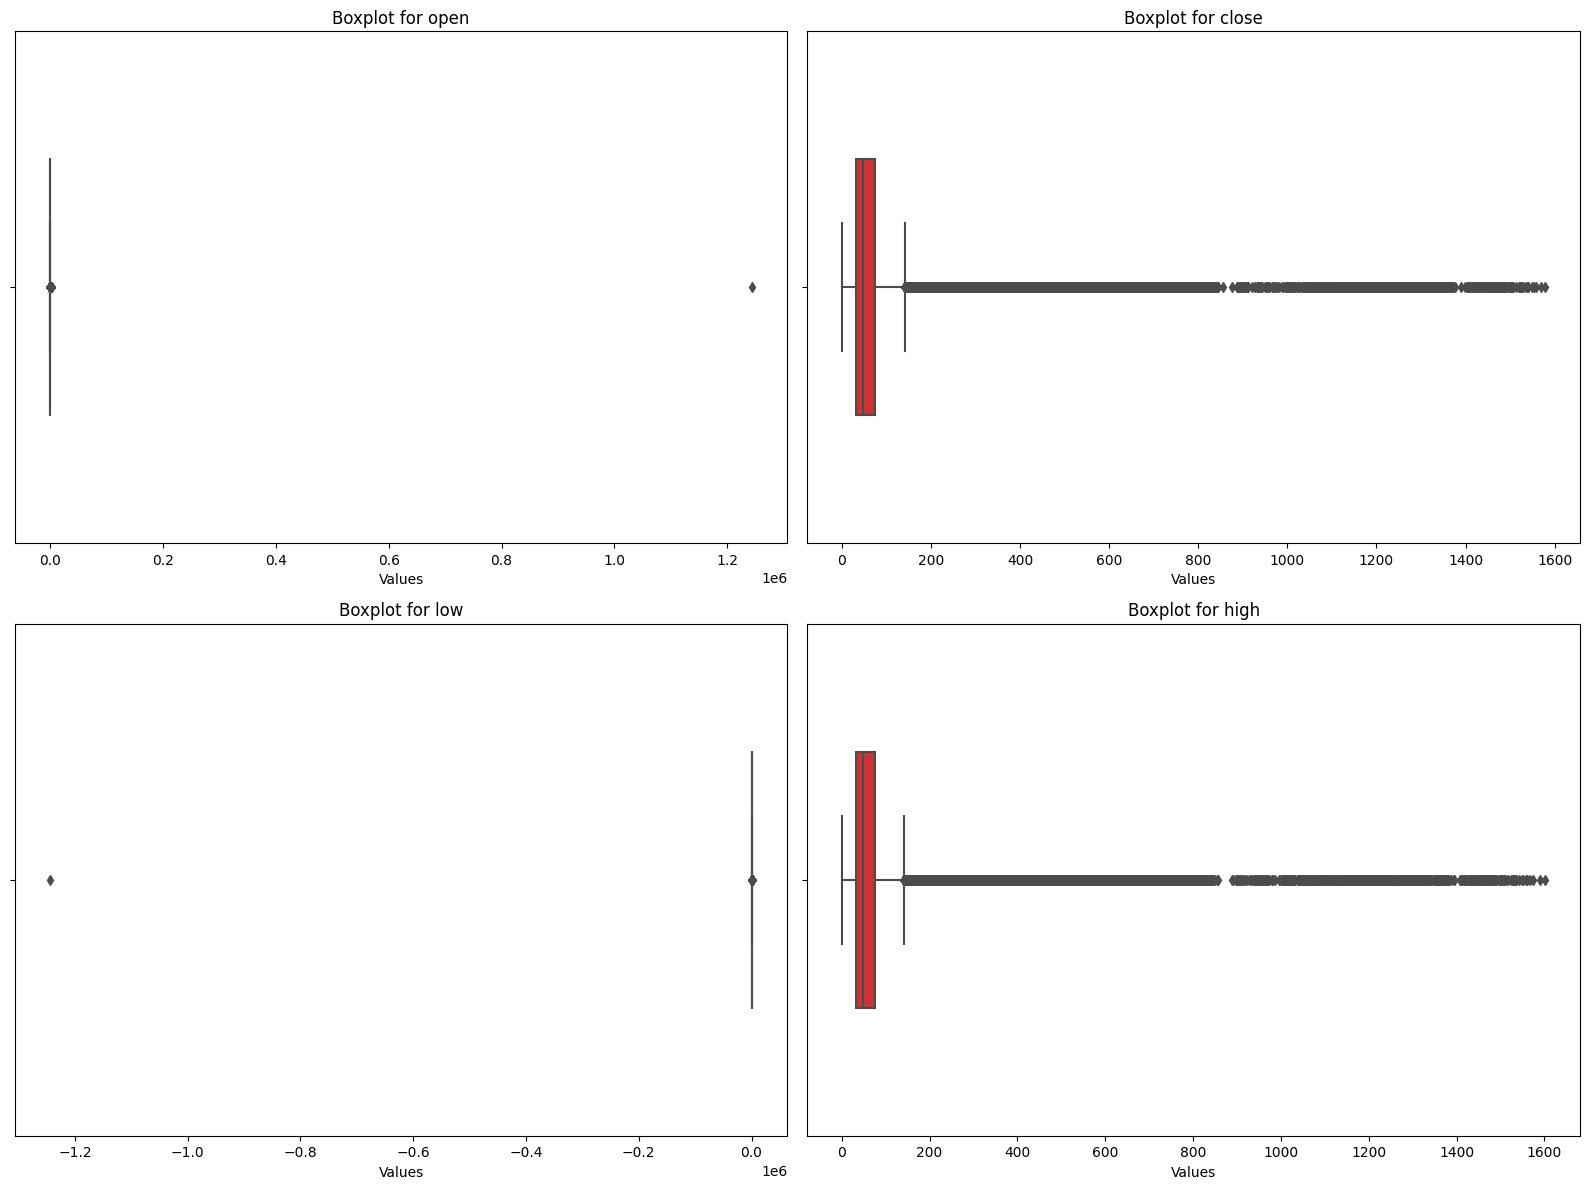

In [15]:
# Set the size of the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Select only numerical columns for boxplots
numerical_columns = ['open', 'close', 'low', 'high']

# Draw a separate boxplot for each numerical column
for i, column in enumerate(numerical_columns):
    row, col = divmod(i, 2)
    sns.boxplot(x=stock_price_df[column], ax=axes[row, col], width=0.5, palette="Set1")
    axes[row, col].set_title(f'Boxplot for {column}')
    axes[row, col].set_xlabel('Values')

# Adjust layout
plt.tight_layout()
plt.show()

In [16]:
# Select only numerical columns for outlier identification
numerical_columns = ['open', 'close', 'low', 'high']

# Set a higher threshold for identifying extreme outliers
extreme_outlier_threshold = 35

# Iterate over numerical columns to find extreme outliers
for column in numerical_columns:
    upper_bound = stock_price_df[column].quantile(0.75) + extreme_outlier_threshold * (stock_price_df[column].quantile(0.75) - stock_price_df[column].quantile(0.25))
    lower_bound = stock_price_df[column].quantile(0.25) - extreme_outlier_threshold * (stock_price_df[column].quantile(0.75) - stock_price_df[column].quantile(0.25))
    
    extreme_outliers_positive = stock_price_df[stock_price_df[column] > upper_bound]
    extreme_outliers_negative = stock_price_df[stock_price_df[column] < lower_bound]
    
    # Print the values and indices of extreme positive outliers
    if not extreme_outliers_positive.empty:
        print(f"Values and Indices of Extreme Positive Outliers for {column}:")
        print("Values:", extreme_outliers_positive[column].tolist())
        print("Indices:", extreme_outliers_positive.index.tolist())
    else:
        print(f"No extreme positive outliers found for {column}")
    
    # Print the values and indices of extreme negative outliers
    if not extreme_outliers_negative.empty:
        print(f"Values and Indices of Extreme Negative Outliers for {column}:")
        print("Values:", extreme_outliers_negative[column].tolist())
        print("Indices:", extreme_outliers_negative.index.tolist())
    else:
        print(f"No extreme negative outliers found for {column}")

Values and Indices of Extreme Positive Outliers for open:
Values: [1244300.0]
Indices: [31]
No extreme negative outliers found for open
No extreme positive outliers found for close
No extreme negative outliers found for close
No extreme positive outliers found for low
Values and Indices of Extreme Negative Outliers for low:
Values: [-1244300.0]
Indices: [31]
No extreme positive outliers found for high
No extreme negative outliers found for high


In [17]:
# Dropping the record with oulier
stock_price_df.drop(31, inplace=True)

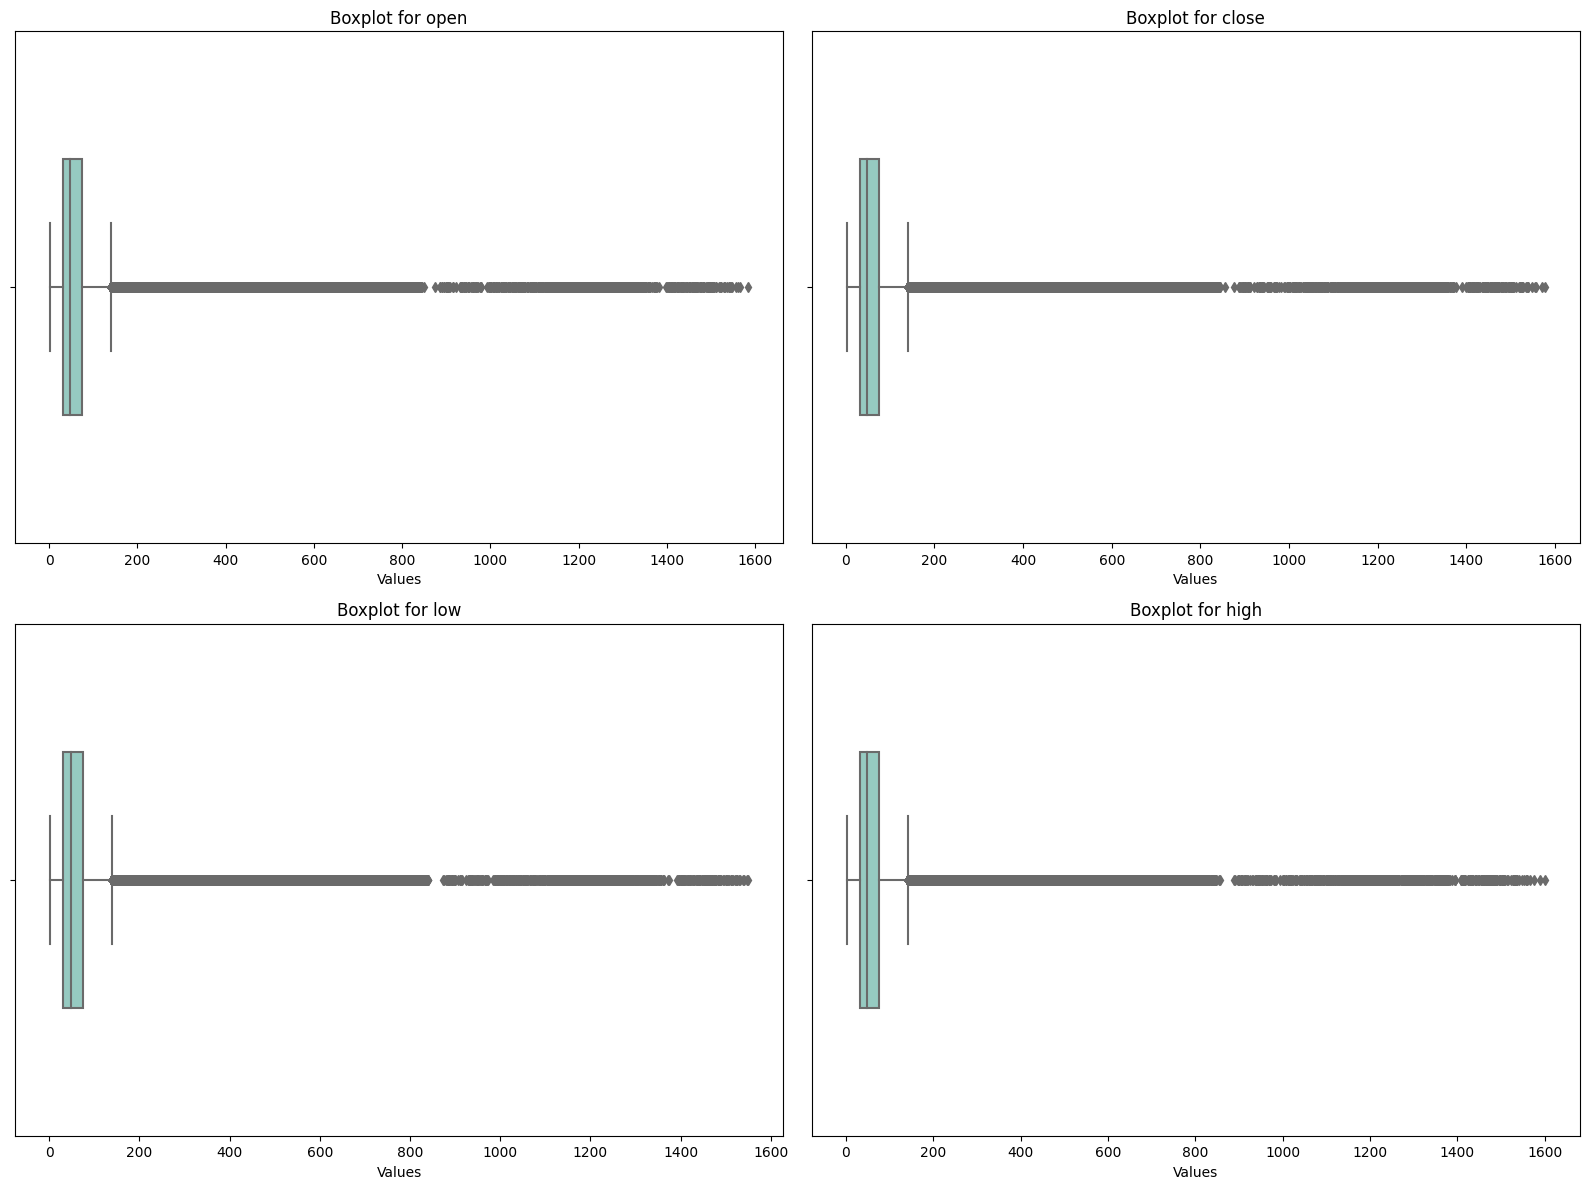

In [18]:
# Set the size of the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Select only numerical columns for boxplots
numerical_columns = ['open', 'close', 'low', 'high']

# Draw a separate boxplot for each numerical column
for i, column in enumerate(numerical_columns):
    row, col = divmod(i, 2)
    sns.boxplot(x=stock_price_df[column], ax=axes[row, col], width=0.5, palette="Set3")
    axes[row, col].set_title(f'Boxplot for {column}')
    axes[row, col].set_xlabel('Values')

# Adjust layout
plt.tight_layout()
plt.show()

In [19]:
csv_file_path = r'C:\Users\Amanpreet Kaur\Documents\Data Analytics - INFO8066\Final Project\prices-split-adjusted-cleaned.csv'

# Export DataFrame to Excel
stock_price_df.to_csv(csv_file_path, index=False)

## Key metrics

### Summary Statistics

In [20]:
print("Summary Statistics:")
print(stock_price_df.describe())

Summary Statistics:
                open          close            low           high  \
count  851263.000000  851263.000000  851263.000000  851263.000000   
mean       64.993595      65.011892      64.336531      65.639693   
std        75.203906      75.201230      74.459530      75.906889   
min         1.660000       1.590000       1.500000       1.810000   
25%        31.270000      31.293029      30.940001      31.620001   
50%        48.459999      48.480000      47.970001      48.959999   
75%        75.120003      75.139999      74.400002      75.849998   
max      1584.439941    1578.130005    1549.939941    1600.930054   

             volume  
count  8.512630e+05  
mean   5.415118e+06  
std    1.249469e+07  
min    0.000000e+00  
25%    1.221500e+06  
50%    2.476300e+06  
75%    5.222500e+06  
max    8.596434e+08  


### Merging the datasets using INNER JOIN

In [21]:
# Merge the DataFrames based on the 'symbol' and 'Ticker symbol' column
merged_df = pd.merge(stock_price_df, securities_data, how='inner', left_on='symbol', right_on='Ticker symbol')

# Display the merged DataFrame
print("Merged DataFrame:")
print(merged_df.head())

# Now, you can calculate a KPI using the merged DataFrame
# For example, let's calculate the average adjusted close price per sector
kpi_df = merged_df.groupby('GICS Sector')['close'].mean()

# Display the calculated KPI
print("\nKey Performance Indicator (KPI):")
print(kpi_df)

Merged DataFrame:
        date symbol        open       close         low        high   volume  \
0 2016-05-01   WLTW  123.430000  125.839996  122.309998  126.250000  2163600   
1 2016-06-01   WLTW  125.239998  119.980003  119.940002  125.540001  2386400   
2 2016-07-01   WLTW  116.379997  114.949997  114.930000  119.739998  2489500   
3 2016-08-01   WLTW  115.480003  116.620003  113.500000  117.440002  2006300   
4 2016-11-01   WLTW  117.010002  114.970001  114.089996  117.330002  1408600   

  Ticker symbol              Security SEC filings GICS Sector  \
0          WLTW  Willis Towers Watson     reports  Financials   
1          WLTW  Willis Towers Watson     reports  Financials   
2          WLTW  Willis Towers Watson     reports  Financials   
3          WLTW  Willis Towers Watson     reports  Financials   
4          WLTW  Willis Towers Watson     reports  Financials   

   GICS Sub Industry Address of Headquarters Date first added      CIK  
0  Insurance Brokers  London, United 

### Top and Bottom 5 Sectors - Average Adjusted Close Price

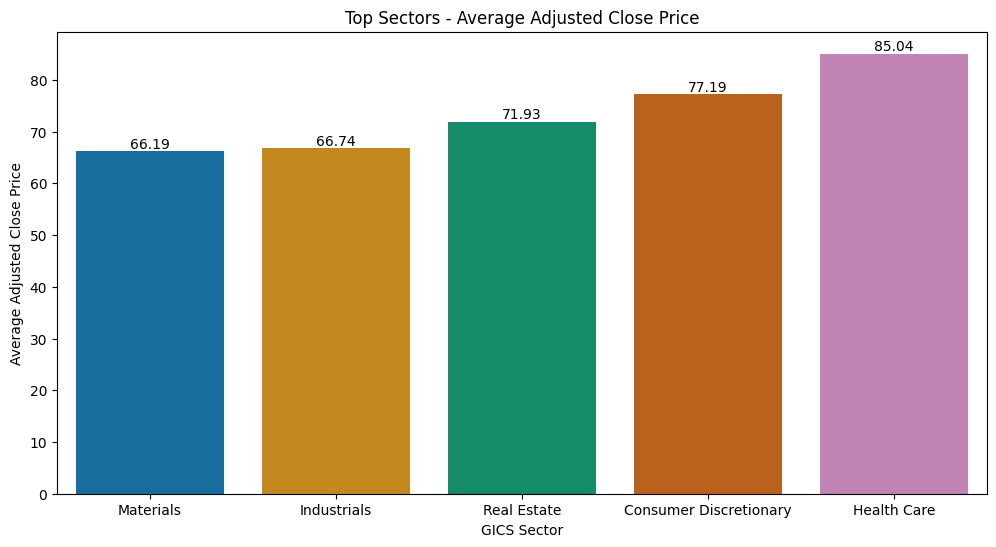

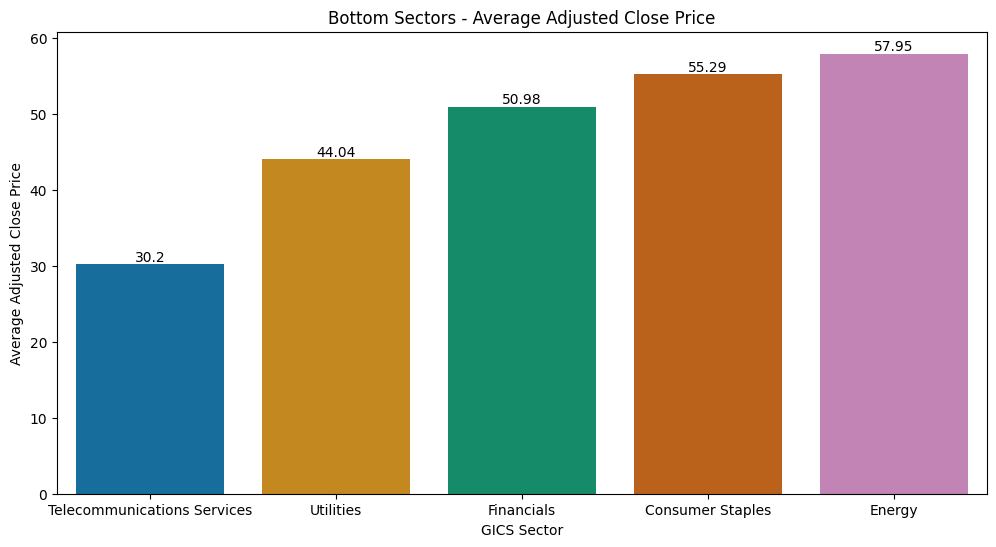

In [22]:
# Sort the KPI values
sorted_kpi_df = kpi_df.sort_values()

# Set a more professional palette: "colorblind"
sns.set_palette("colorblind")

# Plot the top and bottom values
plt.figure(figsize=(12, 6))

# Plot top values
top_plot = sns.barplot(x=sorted_kpi_df.tail(5).index, y=sorted_kpi_df.tail(5).values)
plt.title('Top Sectors - Average Adjusted Close Price')
plt.xlabel('GICS Sector')
plt.ylabel('Average Adjusted Close Price')

# Add labels on bars
for index, value in enumerate(sorted_kpi_df.tail(5).values):
    top_plot.text(index, value, round(value, 2), ha='center', va='bottom')

plt.show()

# Plot bottom values
plt.figure(figsize=(12, 6))
bottom_plot = sns.barplot(x=sorted_kpi_df.head(5).index, y=sorted_kpi_df.head(5).values)
plt.title('Bottom Sectors - Average Adjusted Close Price')
plt.xlabel('GICS Sector')
plt.ylabel('Average Adjusted Close Price')

# Add labels on bars
for index, value in enumerate(sorted_kpi_df.head(5).values):
    bottom_plot.text(index, value, round(value, 2), ha='center', va='bottom')

plt.show()

### Top and Bottom 5 Sectors - Average Trading Volume

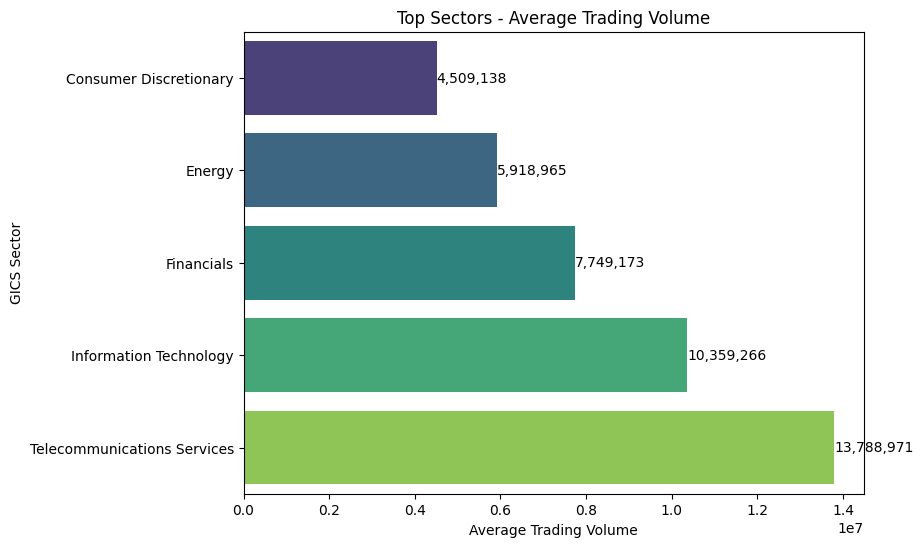

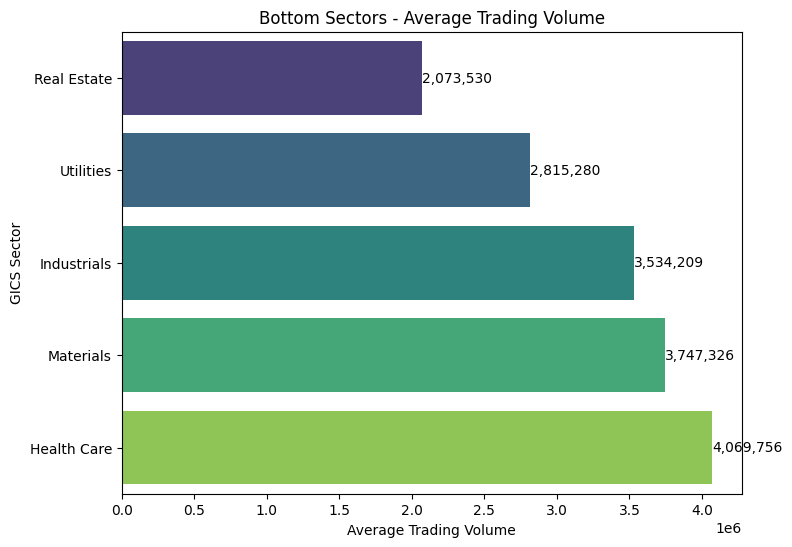

In [23]:
# Calculate the KPI: Average trading volume per sector
volume_kpi_df = merged_df.groupby('GICS Sector')['volume'].mean()

# Sort the volume KPI values
sorted_volume_kpi_df = volume_kpi_df.sort_values()

# Plot the top and bottom values for average trading volume
plt.figure(figsize=(8, 6))

# Plot top values using horizontal bar plot
top_volume_plot = sns.barplot(x=sorted_volume_kpi_df.tail(5).values, y=sorted_volume_kpi_df.tail(5).index, palette='viridis')
plt.title('Top Sectors - Average Trading Volume')
plt.xlabel('Average Trading Volume')
plt.ylabel('GICS Sector')

# Add labels on bars
for index, value in enumerate(sorted_volume_kpi_df.tail(5).values):
    top_volume_plot.text(value, index, f"{int(value):,}", ha='left', va='center')

plt.show()

# Plot bottom values using horizontal bar plot
plt.figure(figsize=(8, 6))
bottom_volume_plot = sns.barplot(x=sorted_volume_kpi_df.head(5).values, y=sorted_volume_kpi_df.head(5).index, palette='viridis')
plt.title('Bottom Sectors - Average Trading Volume')
plt.xlabel('Average Trading Volume')
plt.ylabel('GICS Sector')

# Add labels on bars
for index, value in enumerate(sorted_volume_kpi_df.head(5).values):
    bottom_volume_plot.text(value, index, f"{int(value):,}", ha='left', va='center')

plt.show()


HOTTEST SECTOR
Health Care

WORST SECTOR
Telecommunications Services



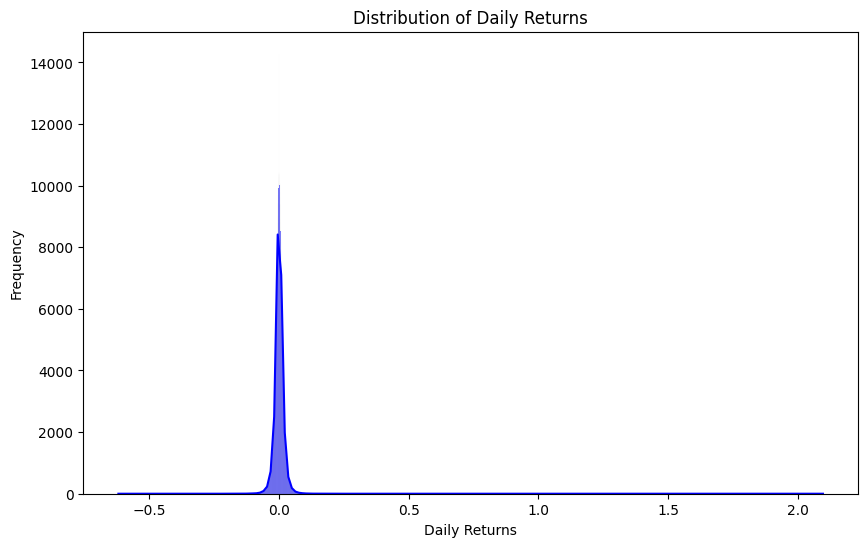

In [24]:
# Calculate daily returns
daily_returns = merged_df.groupby('Security')['close'].pct_change()

# Calculate market and sector summary values
market_return = daily_returns.mean() * 100  # in percentage

hottest_sector = daily_returns.groupby(merged_df['GICS Sector']).mean().idxmax()
worst_sector = daily_returns.groupby(merged_df['GICS Sector']).mean().idxmin()

# Print the summary

print("HOTTEST SECTOR")
print(f"{hottest_sector}\n")
print("WORST SECTOR")
print(f"{worst_sector}\n")


# Visualize the daily returns
plt.figure(figsize=(10, 6))
sns.histplot(daily_returns.dropna(), kde=True, color='blue')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

In [25]:
sub_industry_counts = securities_data['GICS Sector'].value_counts()

# Create a pie chart
fig = px.pie(sub_industry_counts, 
             values=sub_industry_counts.values,
             names=sub_industry_counts.index,
             title='Distribution of GICS Sector',
             labels={'names': 'GICS Sector'})

# Show the plot
fig.show()

The above Pie chart shows the disctribution of GICS Sector in our data. There are total of 11 unique GICS Sectors. Consumer Discretionary contributes the most with 16.8% while Telecommunications Services contributes the least with 0.99%

## Exploratory Data Analysis

In [26]:
#print(fund_data.shape)
print(stock_price_df.shape)
#print(prices_data.shape)
print(securities_data.shape)

(851263, 7)
(505, 8)


The dataset encompasses a broad spectrum of financial data, encompassing 505 distinct stocks with a total of 851,263 individual price points. In order to delve into the specific dynamics of individual stocks, our focus shifts to a subset of prominent technology companies: Apple (AAPL), Amazon (AMZN), Google (GOOGL), Netflix (NFLX), and Facebook (FB). This selective approach allows us to closely examine the price fluctuations of these industry leaders over the initial 200 days of available data.

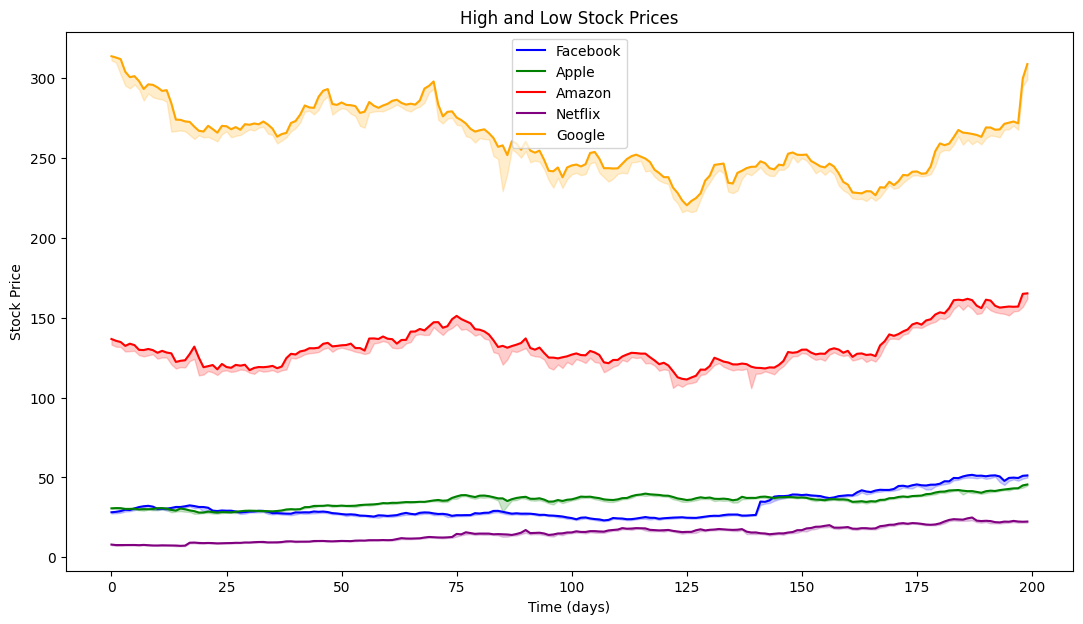

In [27]:
# Setting the color palette for the plot
sns.set_palette("Set1")

# Creating a line plot with shaded area for the high and low stock prices for apple,google,amazon,netflix and facebook for the first 200 days
plt.figure(figsize=(13, 7))

# Plotting the high stock prices
plt.plot(range(200), stock_price_df[stock_price_df.symbol == 'FB'].high.values[:200], label='Facebook', linestyle='-', color='blue')
plt.plot(range(200), stock_price_df[stock_price_df.symbol == 'AAPL'].high.values[:200], label='Apple', linestyle='-', color='green')
plt.plot(range(200), stock_price_df[stock_price_df.symbol == 'AMZN'].high.values[:200], label='Amazon', linestyle='-', color='red')
plt.plot(range(200), stock_price_df[stock_price_df.symbol == 'NFLX'].high.values[:200], label='Netflix', linestyle='-', color='purple')
plt.plot(range(200), stock_price_df[stock_price_df.symbol == 'GOOG'].high.values[:200], label='Google', linestyle='-', color='orange')

# Plotting the low stock prices with shaded area in between
plt.fill_between(range(200),
                 stock_price_df[stock_price_df.symbol == 'FB'].low.values[:200],
                 stock_price_df[stock_price_df.symbol == 'FB'].high.values[:200],
                 color='blue', alpha=0.2)

plt.fill_between(range(200),
                 stock_price_df[stock_price_df.symbol == 'AAPL'].low.values[:200],
                 stock_price_df[stock_price_df.symbol == 'AAPL'].high.values[:200],
                 color='green', alpha=0.2)

plt.fill_between(range(200),
                 stock_price_df[stock_price_df.symbol == 'AMZN'].low.values[:200],
                 stock_price_df[stock_price_df.symbol == 'AMZN'].high.values[:200],
                 color='red', alpha=0.2)

plt.fill_between(range(200),
                 stock_price_df[stock_price_df.symbol == 'NFLX'].low.values[:200],
                 stock_price_df[stock_price_df.symbol == 'NFLX'].high.values[:200],
                 color='purple', alpha=0.2)

plt.fill_between(range(200),
                 stock_price_df[stock_price_df.symbol == 'GOOG'].low.values[:200],
                 stock_price_df[stock_price_df.symbol == 'GOOG'].high.values[:200],
                 color='orange', alpha=0.2)

# Adding title and axis labels to the plot
plt.title('High and Low Stock Prices')
plt.xlabel('Time (days)')
plt.ylabel('Stock Price')

# Adding a legend to identify each company in the plot
plt.legend(loc='best')

# Displaying the plot
plt.show()

The graph clearly illustrates the fluctuation in stock prices for companies - Amazon,Apple,Netflix,Google,Facebook over the first 200 days.
Each line represents the high stock prices of a specific company, while the shaded areas between the lines depict the range between the high and low stock prices.

In [28]:
# Function to get the maximum high value for a given symbol
def get_max_high(sym):
    highs = stock_price_df[stock_price_df['symbol'] == sym].high.values
    return max(highs)

# List of specific stocks
selected_stocks = ['AAPL', 'AMZN', 'GOOGL', 'NFLX', 'FB']

# Get the maximum high values and associate them with company names
max_highs = {sym: get_max_high(sym) for sym in selected_stocks}

# Print the results
for sym, high in max_highs.items():
    print(f'{sym}: {high}')

AAPL: 134.539993
AMZN: 847.210022
GOOGL: 839.0
NFLX: 133.270004
FB: 133.5


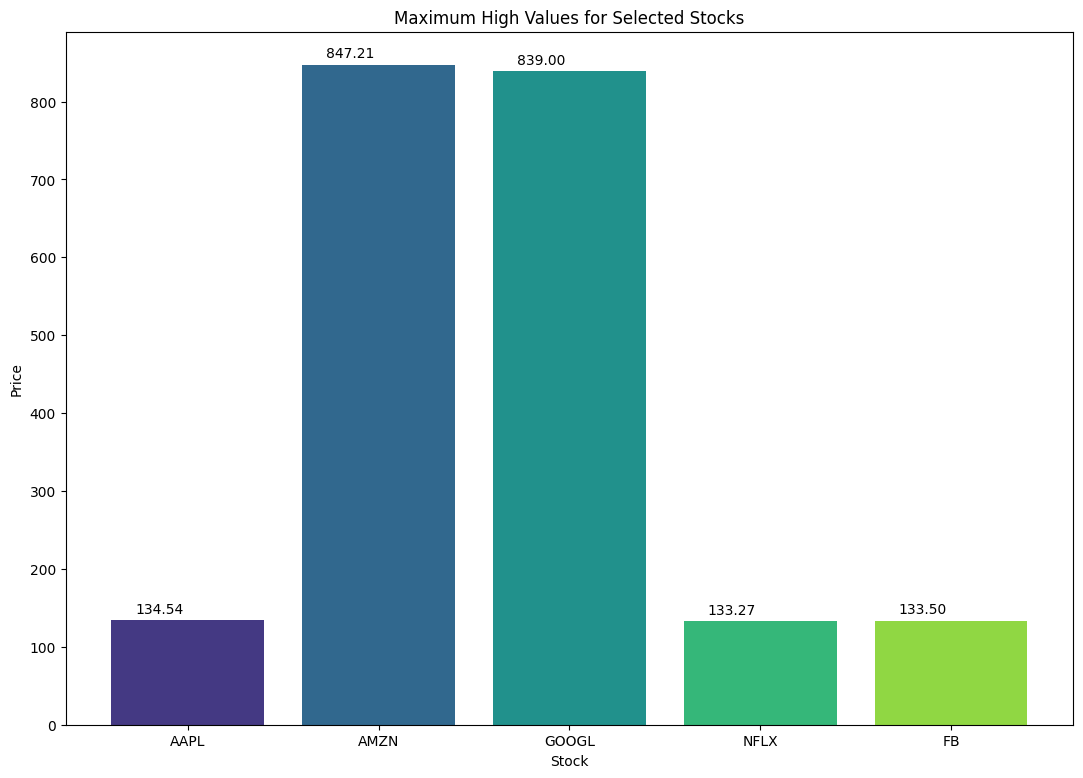

In [29]:
# Creating a color palette for better visualization
colors = sns.color_palette("viridis", len(selected_stocks))

# Creating a bar chart with a color gradient
plt.figure(figsize=(13, 9))

# Bar chart for maximum high values
bars = plt.bar(selected_stocks, [max_highs[sym] for sym in selected_stocks], color=colors)

# Adding data labels on top of the bars
for bar, high_value in zip(bars, [max_highs[sym] for sym in selected_stocks]):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 5, f'{high_value:.2f}', ha='center', va='bottom', color='black')

# Adjusting the appearance of the plot
plt.title('Maximum High Values for Selected Stocks')
plt.ylabel('Price')
plt.xlabel('Stock')

# Displaying the plot
plt.show()

The bar chart effectively visualizes the maximum high values for a selected group of stocks, including Netflix, Facebook, Amazon, Apple, and Google.
This visualization allows for a quick comparison, offering insights into the relative performance and highlighting potential investment opportunities or areas of interest among these key stocks.

In [30]:
# Function to get the minimum low value for a given symbol
def get_min_low(sym):
    lows = stock_price_df[stock_price_df['symbol'] == sym].low.values
    return min(lows)

# List of specific stocks
selected_stocks = ['NFLX', 'FB', 'AMZN', 'AAPL', 'GOOGL']

# Get the minimum low values for the selected stocks
min_lows = [get_min_low(sym) for sym in selected_stocks]

# Print the results
for sym, low in zip(selected_stocks, min_lows):
    print(f'{sym}: {low}')

NFLX: 6.931428429
FB: 22.67
AMZN: 105.800003
AAPL: 27.17857171
GOOGL: 217.032031


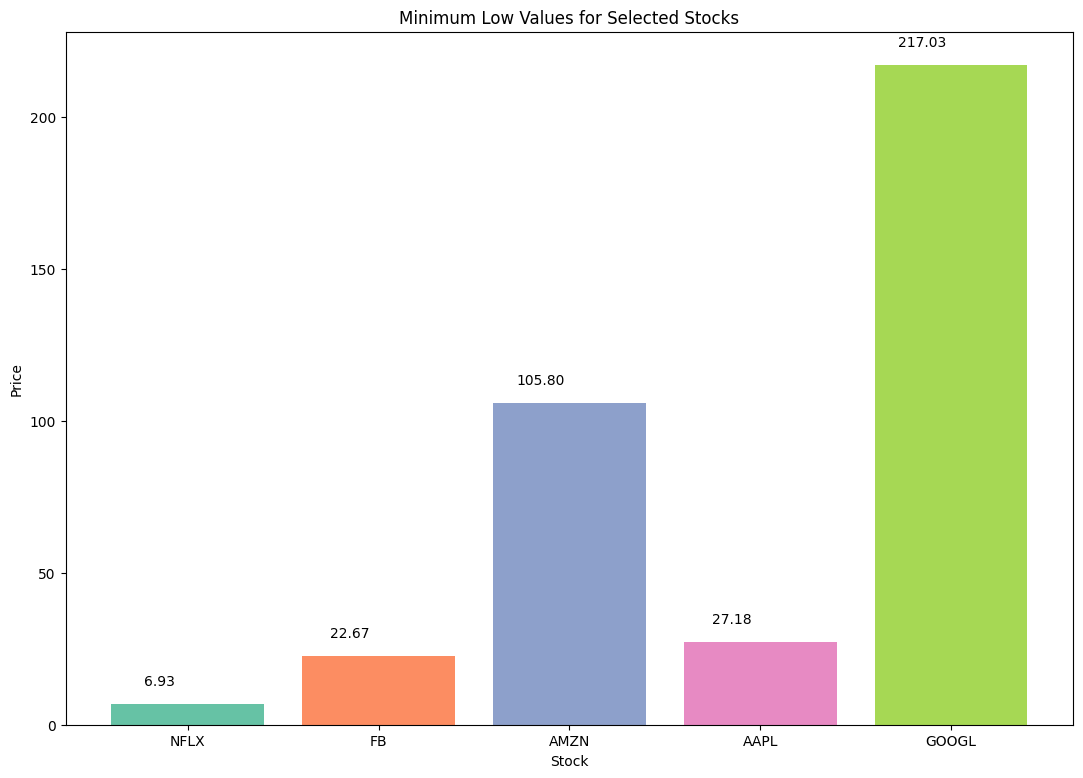

In [31]:
# Creating a color palette for better visualization
colors = sns.color_palette("Set2", len(selected_stocks))

# Creating a bar chart with a color gradient
plt.figure(figsize=(13, 9))
bar_width=0.7
bars = plt.bar(selected_stocks, min_lows, color=colors)

# Adding data labels on top of the bars
for bar, high_value in zip(bars, min_lows):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 5, f'{high_value:.2f}', ha='center', va='bottom', color='black')

# Adjusting the appearance of the plot
plt.title('Minimum Low Values for Selected Stocks')
plt.ylabel('Price')
plt.xlabel('Stock')

# Displaying the plot
plt.show()

The bar chart visually represents the minimum low values for selected stocks (Netflix, Facebook, Amazon, Apple, and Google). 
Each bar corresponds to a specific stock, with heights reflecting the respective minimum low prices.

In [32]:
stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851263 entries, 0 to 851270
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    851263 non-null  datetime64[ns]
 1   symbol  851263 non-null  object        
 2   open    851263 non-null  float64       
 3   close   851263 non-null  float64       
 4   low     851263 non-null  float64       
 5   high    851263 non-null  float64       
 6   volume  851263 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 52.0+ MB


In [33]:
prices_adj_data_google = stock_price_df[stock_price_df.symbol == 'GOOGL']

# Convert 'date' column to datetime type
prices_adj_data_google['date'] = pd.to_datetime(prices_adj_data_google['date'])

# Filter data for the year 2016
prices_adj_data_2016 = prices_adj_data_google.loc[(prices_adj_data_google['date'].dt.year == 2016)]

# Create candlestick chart
fig = go.Figure(data=[go.Candlestick(x=prices_adj_data_2016['date'],
                open=prices_adj_data_2016['open'],
                high=prices_adj_data_2016['high'],
                low=prices_adj_data_2016['low'],
                close=prices_adj_data_2016['close'])])

# Customize layout
fig.update_layout(title='Candlestick Chart for 2016',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False,
                  xaxis=dict(type='category', tickformat='%Y-%m-%d'))

# Show the chart
fig.show()


The above candlestick graph depicts the technical analysis of equity and currency price patterns. It determines possible price movement based on patterns along with the opening price, closing price, high and low of that time period. The rectangular body is colored with a dark color red for a drop in price and a light color green for a price increase.

In [34]:
# Filter data for the year 2016
prices_adj_data_2016 = prices_adj_data_google[prices_adj_data_google['date'].dt.year == 2016]

# Create a bar chart for volume in the year 2016
fig = go.Figure()

fig.add_trace(go.Bar(x=prices_adj_data_2016['date'],
                     y=prices_adj_data_2016['volume'],
                     marker=dict(color='darkblue'),
                     name='Volume'))

# Customize layout
fig.update_layout(title='Stocks Volume Chart for 2016',
                  xaxis_title='Date',
                  yaxis_title='Volume',
                  xaxis_rangeslider_visible=False)

# Show the chart
fig.show()


The above graph represents the stocks volume fluctuation patterns. Volume analysis is used by technical analysts as one of many factors that inform the trading decisions. By analyzing trends in volume in conjunction with price movements, investors can determine the significance of changes in a security's price

In [35]:
import pandas as pd
import plotly.graph_objects as go

# Assuming 'prices_adj_data_google' is your DataFrame
# Convert 'date' to datetime if it's not already in datetime format
prices_adj_data_google['date'] = pd.to_datetime(prices_adj_data_google['date'])

# Filter data for November 2016
prices_adj_data_nov_2016 = prices_adj_data_google[
    (prices_adj_data_google['date'].dt.year == 2016) & 
    (prices_adj_data_google['date'].dt.month == 11)
]

# Calculate MACD for the filtered data
prices_adj_data_nov_2016['12_EMA'] = prices_adj_data_nov_2016['close'].ewm(span=12, adjust=False).mean()
prices_adj_data_nov_2016['26_EMA'] = prices_adj_data_nov_2016['close'].ewm(span=26, adjust=False).mean()
prices_adj_data_nov_2016['MACD'] = prices_adj_data_nov_2016['12_EMA'] - prices_adj_data_nov_2016['26_EMA']
prices_adj_data_nov_2016['Signal_Line'] = prices_adj_data_nov_2016['MACD'].ewm(span=9, adjust=False).mean()

# Plot MACD for November 2016
fig = go.Figure()

fig.add_trace(go.Scatter(x=prices_adj_data_nov_2016['date'], y=prices_adj_data_nov_2016['MACD'], mode='lines', name='MACD'))
fig.add_trace(go.Scatter(x=prices_adj_data_nov_2016['date'], y=prices_adj_data_nov_2016['Signal_Line'], mode='lines', name='Signal Line'))

# Customize layout
fig.update_layout(title='MACD Chart for November 2016',
                  xaxis_title='Date',
                  yaxis_title='MACD',
                  xaxis_rangeslider_visible=False)

# Show the chart
fig.show()


The above visulizations shows the Moving Average Convergence Divergence (MACD). This calculates the 12-day and 26-day exponential moving averages (EMA) and the MACD line. It also calculates a 9-day EMA of the MACD to create the Signal Line. MCAD is used to analyze the state of the price action and identify potential buy and sell signals

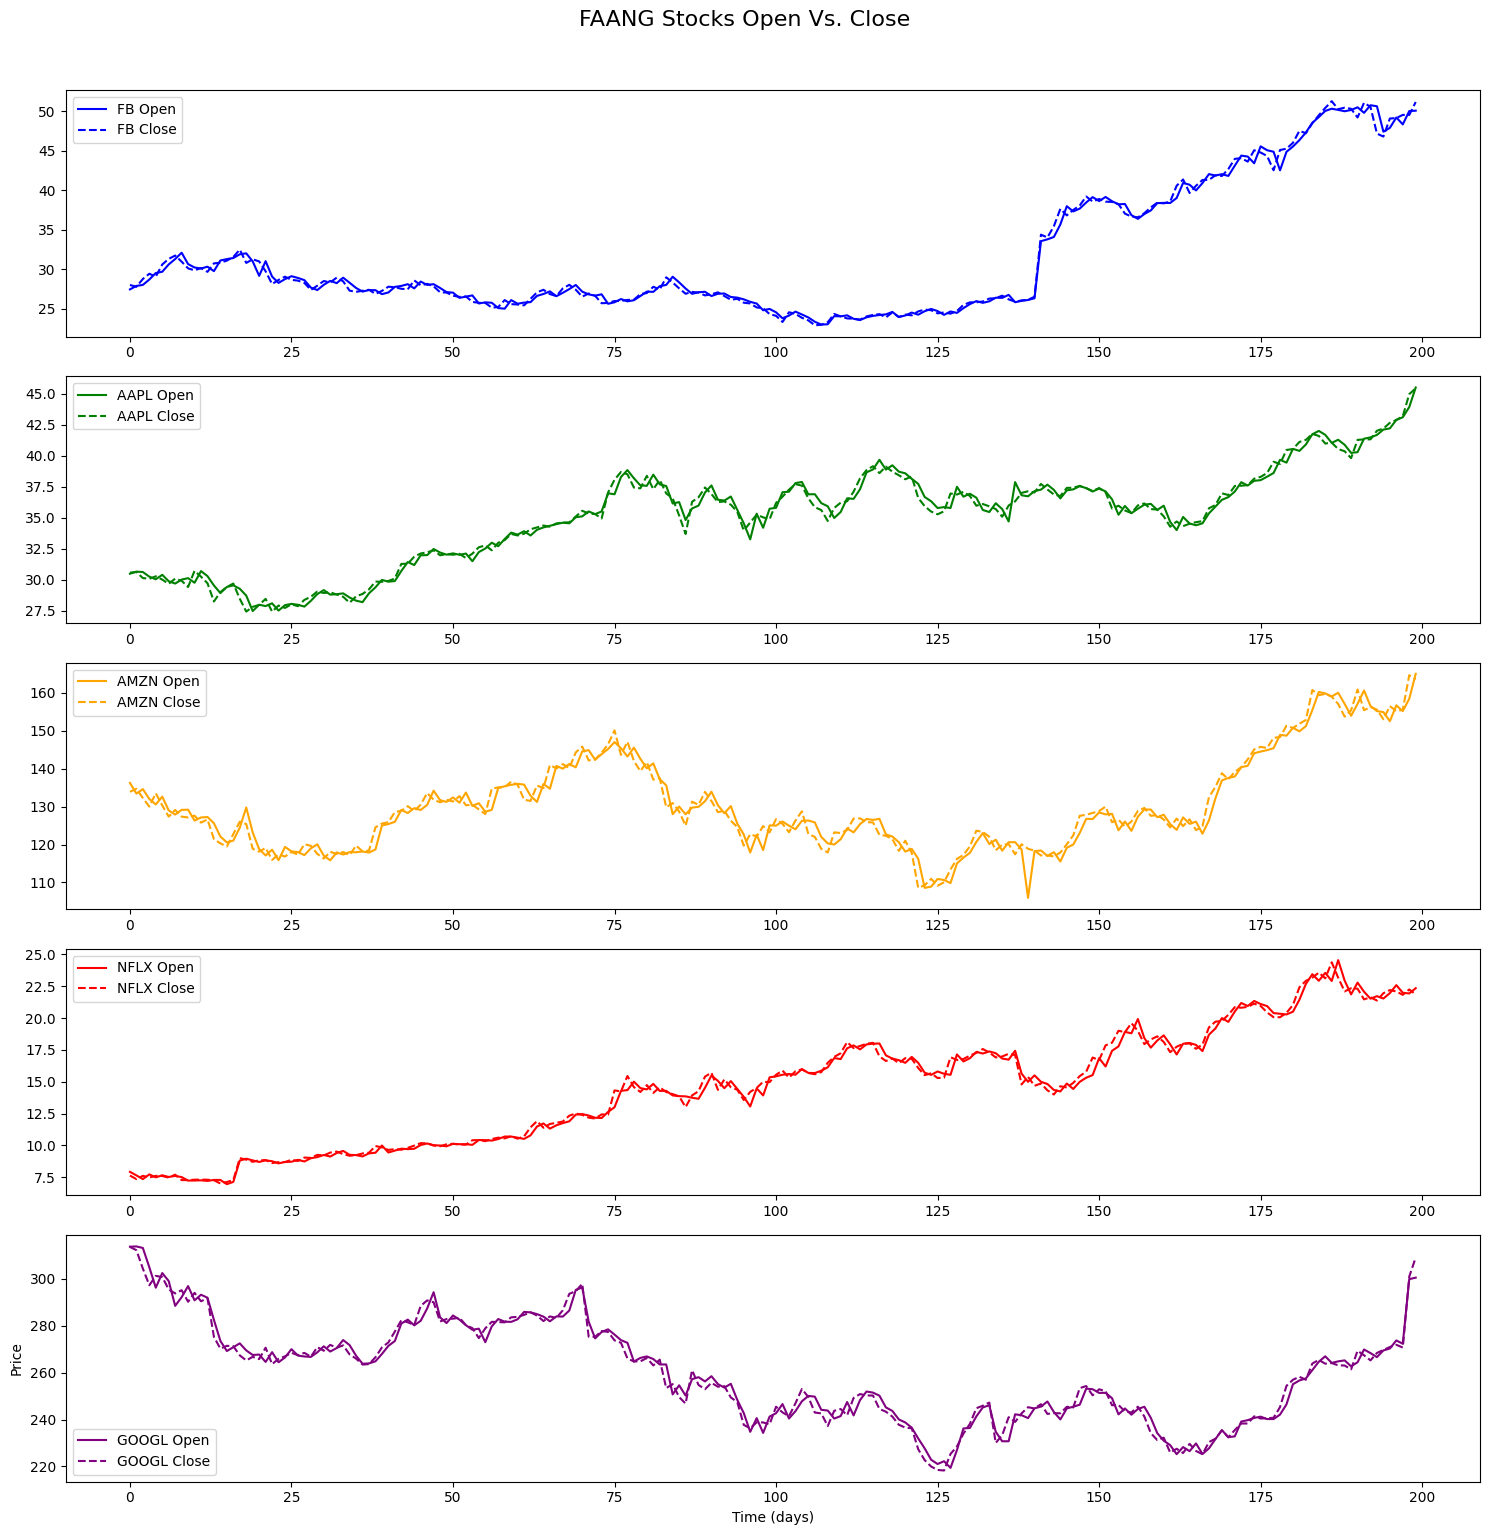

In [36]:
# Define the list of tickers for Facebook, Apple, Amazon, Netflix, and Google
faang_symbols = ['FB', 'AAPL', 'AMZN', 'NFLX', 'GOOGL']

# Define colors for each stock
colors = ['blue', 'green', 'orange', 'red', 'purple']

# Plotting opening vs closing prices for FAANGM stocks
plt.figure(figsize=(15, 15))

for i, (symbol, color) in enumerate(zip(faang_symbols, colors)):
    # Truncate to the first 200 days for clearer visualization
    plt.subplot(len(faang_symbols), 1, i+1)
    plt.plot(stock_price_df[stock_price_df.symbol == symbol].open.values[:200], linestyle='-', label=f'{symbol} Open', color=color)
    plt.plot(stock_price_df[stock_price_df.symbol == symbol].close.values[:200], linestyle='--', label=f'{symbol} Close', color=color)
    plt.legend(loc='best')

plt.suptitle('FAANG Stocks Open Vs. Close', y=1.02, fontsize=16)
plt.xlabel('Time (days)')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

This analysis visualizes the opening and closing prices for the FAANG (Facebook, Apple, Amazon, Netflix, Google) stocks over the first 200 days of available data. Each subplot represents a different company, and the lines depict the trend of opening and closing prices.

Analyzing this plot can provide insights into the daily price movements of these tech giants, allowing viewers to observe patterns, trends, and potential divergences between opening and closing values for each stock. Such visualizations are valuable for technical analysis and can aid investors and analysts in making informed decisions based on historical stock price behavior.

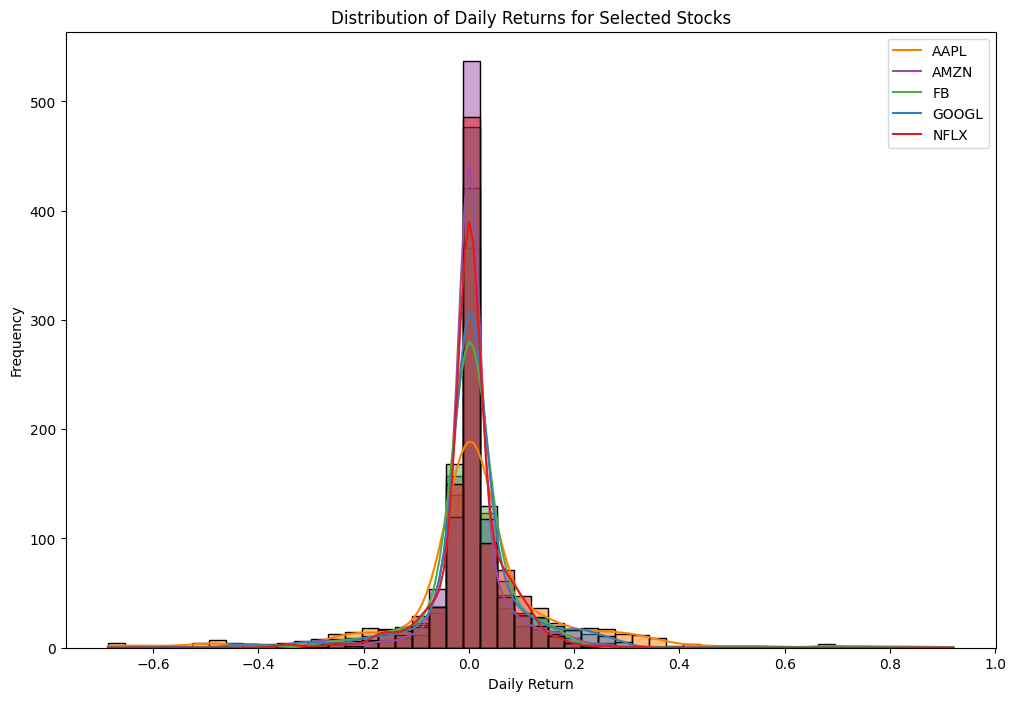

Correlation Matrix:
symbol      AAPL      AMZN        FB     GOOGL      NFLX
symbol                                                  
AAPL    1.000000  0.734890  0.746605  0.793465  0.747986
AMZN    0.734890  1.000000  0.899568  0.942609  0.909919
FB      0.746605  0.899568  1.000000  0.948679  0.902196
GOOGL   0.793465  0.942609  0.948679  1.000000  0.928228
NFLX    0.747986  0.909919  0.902196  0.928228  1.000000

Pairwise Correlation:
FB vs AAPL: 0.7466051364251226
AMZN vs NFLX: 0.909918863948647
GOOGL vs AAPL: 0.7934653275936429


In [37]:
# Extract data for Facebook, Apple, Amazon, Netflix, and Google
selected_symbols = ['FB', 'AAPL', 'AMZN', 'NFLX', 'GOOGL']
selected_data = stock_price_df[stock_price_df['symbol'].isin(selected_symbols)]

# Create a pivot table with 'date' as the index, 'symbol' as columns, and 'close' as values
pivot_table = selected_data.pivot(index='date', columns='symbol', values='close')

# Calculate daily returns for selected stocks
returns = pivot_table.pct_change().dropna()

# Plot the distribution of daily returns
plt.figure(figsize=(12, 8))
sns.histplot(data=returns, bins=50, kde=True)
plt.title('Distribution of Daily Returns for Selected Stocks')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend(returns.columns)
plt.show()

# Calculate correlation matrix
correlation_matrix = pivot_table.corr()

# Calculate pairwise correlation for specific stocks
correlation_fb_aapl = pivot_table['FB'].corr(pivot_table['AAPL'])
correlation_amzn_nflx = pivot_table['AMZN'].corr(pivot_table['NFLX'])
correlation_googl_aapl = pivot_table['GOOGL'].corr(pivot_table['AAPL'])

# Print results
print("Correlation Matrix:")
print(correlation_matrix)

print("\nPairwise Correlation:")
print("FB vs AAPL:", correlation_fb_aapl)
print("AMZN vs NFLX:", correlation_amzn_nflx)
print("GOOGL vs AAPL:", correlation_googl_aapl)

The above code analyzes the daily returns of selected tech stocks (Facebook, Apple, Amazon, Netflix, and Google). 
The distribution plot visually represents the volatility in their daily returns. 
The correlation matrix provides insight into the relationships between stock pairs, with pairwise correlation values indicating the degree of correlation between individual stocks (e.g., FB vs. AAPL, AMZN vs. NFLX, GOOGL vs. AAPL). This analysis aids in understanding the collective market behavior and potential diversification benefits in a portfolio of these tech giants.

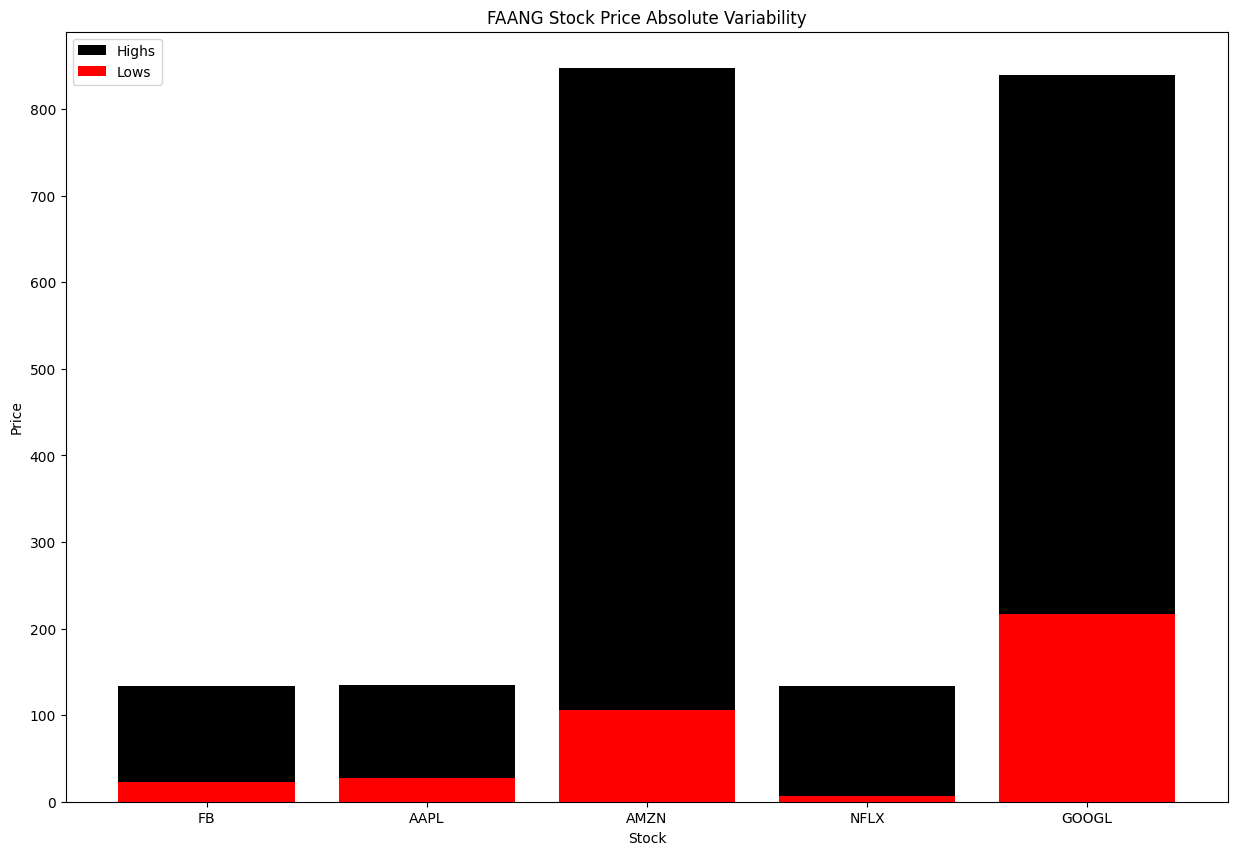

FB's maximum price is 133.5.
FB's minimum price is 22.7.
AAPL's maximum price is 134.5.
AAPL's minimum price is 27.2.
AMZN's maximum price is 847.2.
AMZN's minimum price is 105.8.
NFLX's maximum price is 133.3.
NFLX's minimum price is 6.9.
GOOGL's maximum price is 839.0.
GOOGL's minimum price is 217.0.


In [38]:
# Define the list of tickers for Facebook, Apple, Amazon, Netflix, and Google
faang_symbols = ['FB', 'AAPL', 'AMZN', 'NFLX', 'GOOGL']

# Initialize empty lists for highs and lows
highs = []
lows = []

# Function to get the minimum low for a specific stock
def get_min_low(data, symbol):
    return data[data['symbol'] == symbol]['low'].min()

# Function to get the maximum high for a specific stock
def get_max_high(data, symbol):
    return data[data['symbol'] == symbol]['high'].max()

# Iterate through FAANG stocks and append high and low values
for symbol in faang_symbols:
    lows.append(get_min_low(stock_price_df, symbol))
    highs.append(get_max_high(stock_price_df, symbol))

# Visualizing the absolute variability of stock prices for FAANG stocks
plt.figure(figsize=(15, 10))
plt.bar(faang_symbols, highs, color='black', label='Highs')
plt.bar(faang_symbols, lows, color='red', label='Lows')
plt.title('FAANG Stock Price Absolute Variability')
plt.ylabel('Price')
plt.xlabel('Stock')
plt.legend()
plt.show()

# Displaying the results for Chipotle
for i, symbol in enumerate(faang_symbols):
    print("{}'s maximum price is {}.".format(symbol, round(highs[i], 1)))
    print("{}'s minimum price is {}.".format(symbol, round(lows[i], 1)))

This code visualizes the absolute variability in stock prices for popular FAANG stocks (Facebook, Apple, Amazon, Netflix, and Google). Using bar charts, it compares the highest (black) and lowest (red) prices for each stock. The insights gained from this analysis help viewers understand the historical price ranges and fluctuations within the FAANG group. 

This analysis provides a risk manager with insights into recent stock volatility, laying the groundwork for investment analysts to formulate opinions on whether a particular stock should be classified as a Buy, Hold, or Sell. In the realm of trading positions and investment portfolios, certain strategies may necessitate predefined volatility thresholds. Observing pronounced fluctuations in stock prices suggests that while shorter-term models are conventional, they may not fully account for the inherent risks associated with such wide swings. This underscores the importance of a comprehensive risk assessment to ensure a more accurate representation of the potential risks and opportunities in the market.

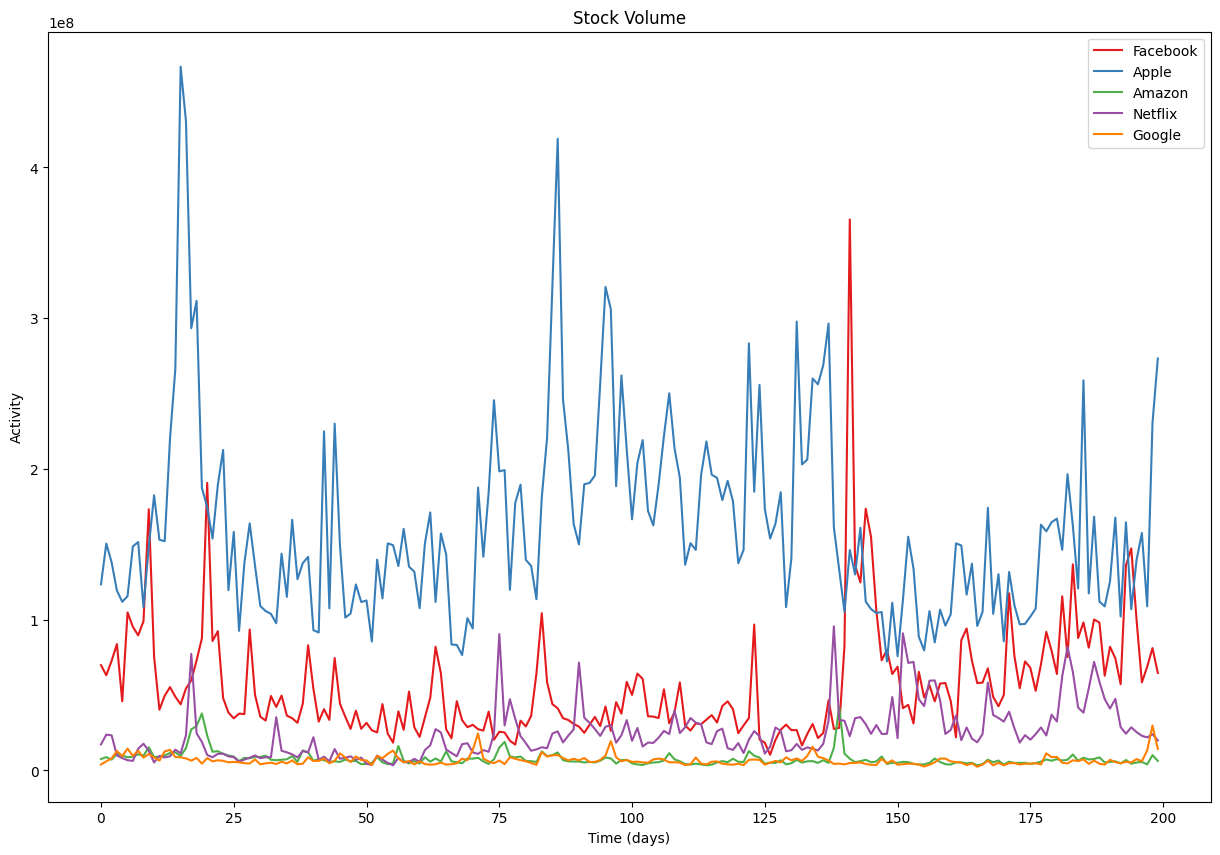

In [39]:
# Defining the tickers for 'FAANG' companies (Facebook, Apple, Amazon, Netflix, and Google)
# Truncating data to the first 200 days for better visualization
plt.figure(figsize=(15, 10))

# Setting the color palette for the plot
sns.set_palette("Set1")

# Plotting the volume data for each 'FAANG' company for the first 200 days
plt.plot(stock_price_df[stock_price_df.symbol == 'FB'].volume.values[:200], linestyle='-', label='Facebook')
plt.plot(stock_price_df[stock_price_df.symbol == 'AAPL'].volume.values[:200], linestyle='-', label='Apple')
plt.plot(stock_price_df[stock_price_df.symbol == 'AMZN'].volume.values[:200], linestyle='-', label='Amazon')
plt.plot(stock_price_df[stock_price_df.symbol == 'NFLX'].volume.values[:200], linestyle='-', label='Netflix')
plt.plot(stock_price_df[stock_price_df.symbol == 'GOOG'].volume.values[:200], linestyle='-', label='Google')

# Adding title and axis labels to the plot
plt.title('Stock Volume')
plt.xlabel('Time (days)')
plt.ylabel('Activity')

# Adding a legend to identify each company in the plot
plt.legend(loc='best')

# Displaying the plot
plt.show()

This represents a substantial amount of trading activity. Let's examine the average trading volume for the entire set of stocks in our dataset.

In [40]:
# Function to calculate the mean trading volume for a given stock symbol
def get_vol_mean(sym):
    # Extracting the trading volumes for a specific stock symbol from the DataFrame
    vols = stock_price_df[stock_price_df['symbol'] == sym].volume.values
    # Calculating and returning the mean of the trading volumes
    return(np.mean(vols))

# Creating a list of unique stock symbols in the dataset
stocks = list(set(stock_price_df.symbol))

# Initializing an empty list to store the mean trading volumes for each stock
vol_mean = []

# Iterating through each stock symbol and calculating its mean trading volume
for sym in stocks:
    # Calling the function to get the mean trading volume for the current stock symbol
    vol_mean.append(get_vol_mean(sym))

In [41]:
# Creating a DataFrame to store the mean trading volumes and corresponding stock symbols
vol_means = pd.DataFrame(vol_mean, columns=['mean_volume'])

# Creating a DataFrame for the list of unique stock symbols
stock_sym = pd.DataFrame(stocks, columns=['tickers'])

# Concatenating the stock symbols and their mean trading volumes into a single DataFrame
vol_df = pd.concat([stock_sym, vol_means], axis=1)

# Displaying the resulting DataFrame
vol_df

tickers   mean_volume
0       HRL  2.017504e+06
1       CAH  2.627299e+06
2       ALL  3.429529e+06
3       CMS  2.717083e+06
4        RF  1.929294e+07
..      ...           ...
496     DOW  9.096609e+06
497     AWK  9.940580e+05
498    ILMN  1.690914e+06
499     PGR  4.053108e+06
500     SLG  8.373110e+05

[501 rows x 2 columns]

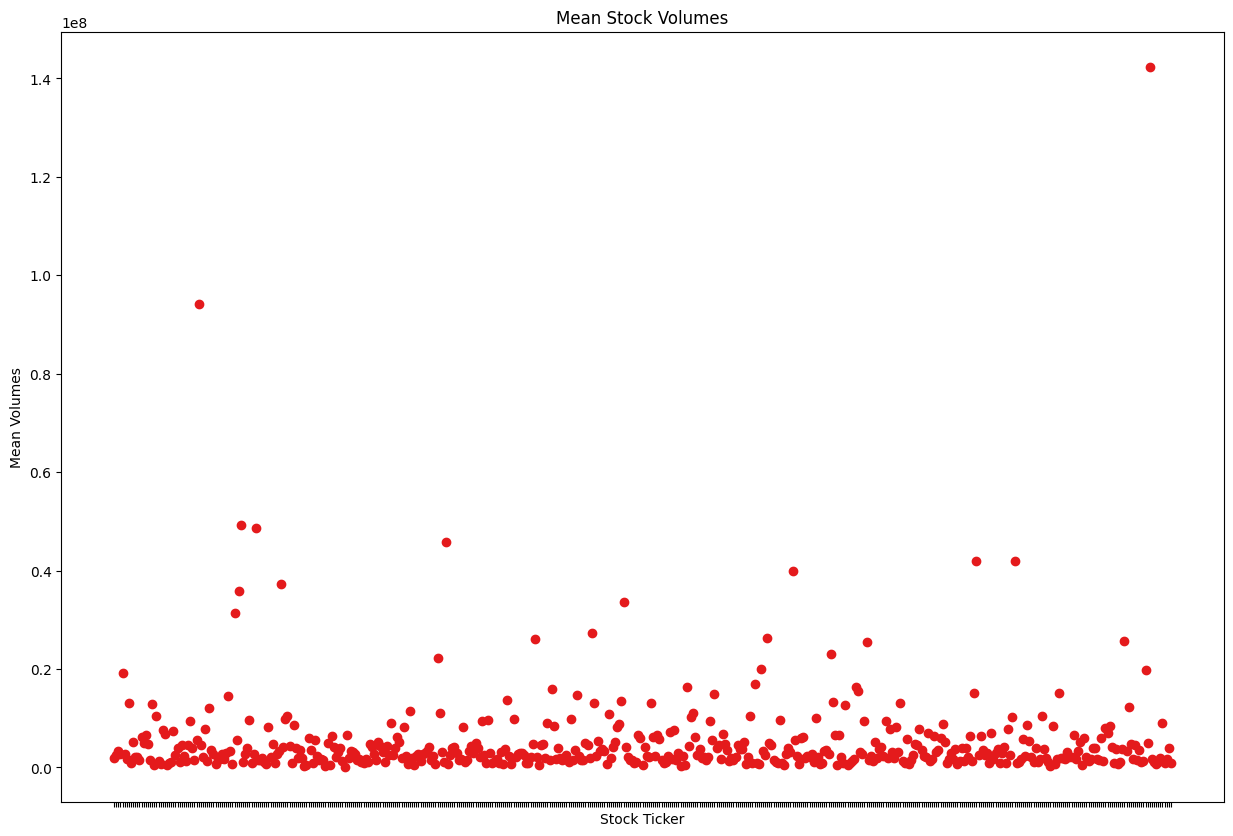

In [42]:
# Creating a scatter plot to visualize mean stock volumes for each stock ticker
fig, ax = plt.subplots(figsize=(15, 10))

# Setting the color palette for the plot
sns.set_palette("Set1")

# Scatter plot with stock tickers on the x-axis and mean volumes on the y-axis
plt.scatter(vol_df['tickers'], vol_df['mean_volume'])

# Adding title and axis labels to the plot
plt.title('Mean Stock Volumes')
plt.ylabel('Mean Volumes')
plt.xlabel('Stock Ticker')

# Removing x-axis labels for better readability
ax.tick_params(labelbottom=False)

# Displaying the plot
plt.show()

Some stocks have really high trading volumes, making it hard to understand if we just put the numbers in a table. We're not looking at the exact numbers, but more at how the average volumes compare to each other. A scatter plot should show that there are a couple of stocks with really different volumes, while most others have volumes in a similar range.

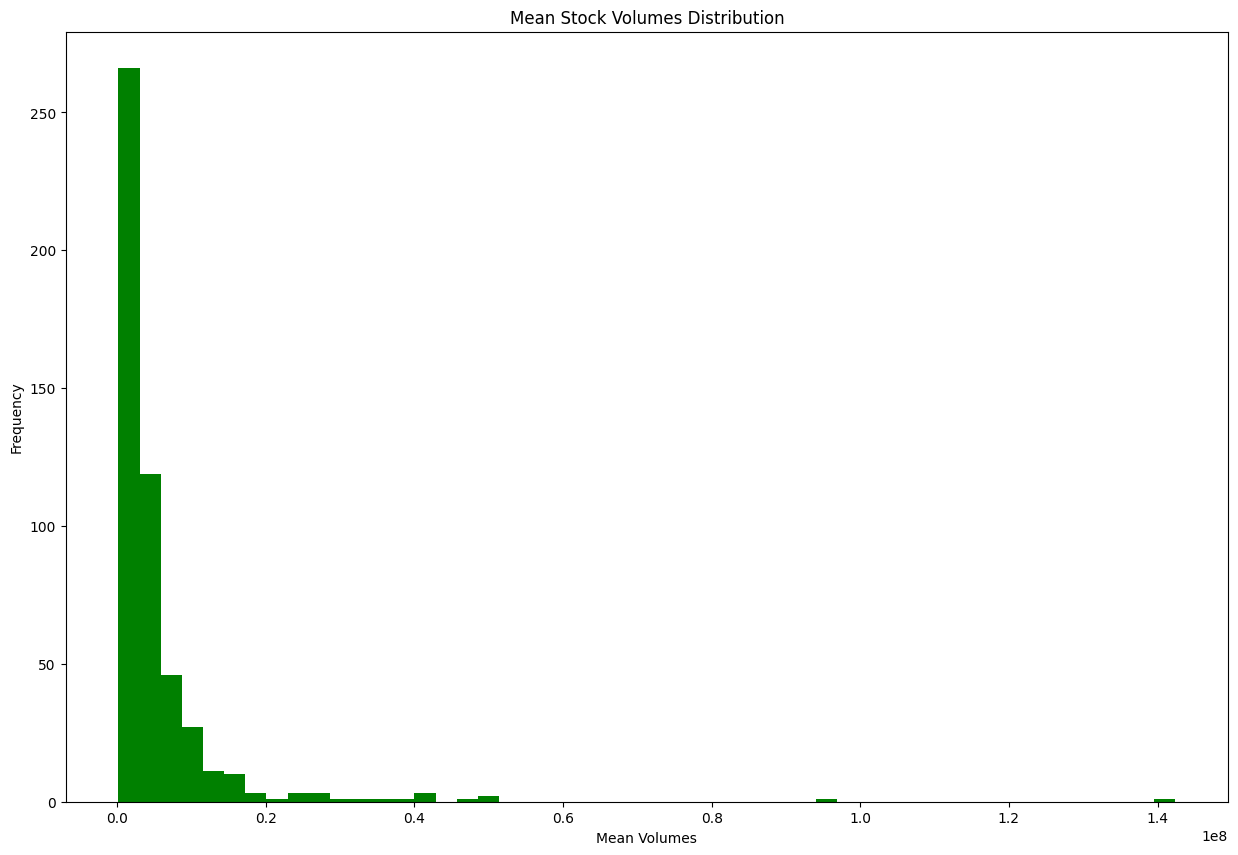

In [43]:
# Creating a histogram to visualize the distribution of mean stock volumes
plt.subplots(figsize=(15, 10))

# Setting the color palette for the plot
sns.set_palette("Set1")

# Histogram plot with mean volumes on the x-axis and frequency (count) on the y-axis
plt.hist(vol_df['mean_volume'], bins=50, color='g')

# Adding title and axis labels to the plot
plt.title('Mean Stock Volumes Distribution')
plt.ylabel('Frequency')
plt.xlabel('Mean Volumes')

# Displaying the plot
plt.show()

The pictures show that most stocks trade in similar amounts, but a few really big ones have a ton of daily trading. Looking at how much a stock trades daily can tell us a couple of things.

Firstly, those really big stocks are usually giant companies that have issued a lot of shares and probably split their stock at some point. 
Big companies usually don't go out of business quickly; they often make a steady profit. That's why they're attractive to investors who want to avoid a lot of risk, like big pension funds. 

Depending on what's happening in their industry, it might also mean these companies could face legal trouble related to antitrust laws. In the end, it's the job of industry experts to know about these things before giving any advice.

## Data Scaling

In [44]:
valid_set_size_percentage = 10 
test_set_size_percentage = 10

# function for min-max normalization of stock
def normalize_data(prices_adj_data):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    prices_adj_data['open'] = min_max_scaler.fit_transform(prices_adj_data.open.values.reshape(-1,1))
    prices_adj_data['high'] = min_max_scaler.fit_transform(prices_adj_data.high.values.reshape(-1,1))
    prices_adj_data['low'] = min_max_scaler.fit_transform(prices_adj_data.low.values.reshape(-1,1))
    prices_adj_data['close'] = min_max_scaler.fit_transform(prices_adj_data['close'].values.reshape(-1,1))
    return prices_adj_data

# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

# choose one stock
df_stock = stock_price_df[stock_price_df.symbol == 'WLTW'].copy()
df_stock.drop(['symbol'],1,inplace=True)
df_stock.drop(['volume'],1,inplace=True)
df_stock.drop(['date'],1,inplace=True)

cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)

# create train, test data
seq_len = 20 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

df_stock.columns.values =  ['open', 'close', 'low', 'high']
x_train.shape =  (184, 19, 4)
y_train.shape =  (184, 4)
x_valid.shape =  (23, 19, 4)
y_valid.shape =  (23, 4)
x_test.shape =  (23, 19, 4)
y_test.shape =  (23, 4)


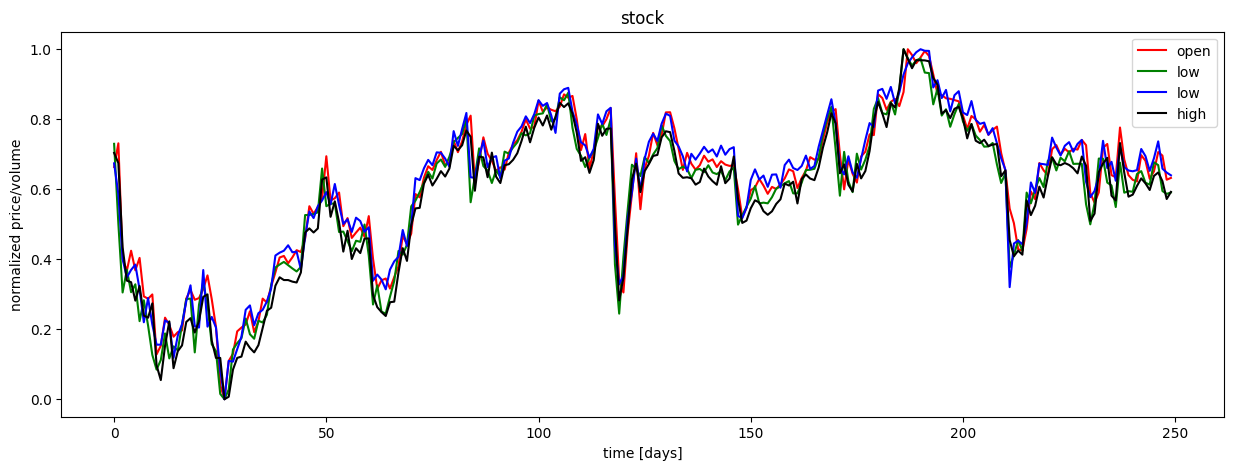

In [45]:
plt.figure(figsize=(15, 5));
plt.plot(df_stock_norm.open.values, color='red', label='open')
plt.plot(df_stock_norm.close.values, color='green', label='low')
plt.plot(df_stock_norm.low.values, color='blue', label='low')
plt.plot(df_stock_norm.high.values, color='black', label='high')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

## Data Modelling - LSTM Model

In [46]:
tf.compat.v1.disable_eager_execution()
from tensorflow.estimator import SessionRunHook

## Basic Cell RNN in tensorflow

index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)

# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
        
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

# parameters
n_steps = seq_len-1 
n_inputs = 4 
n_neurons = 200 
n_outputs = 4
n_layers = 2
learning_rate = 0.001
batch_size = 50
n_epochs = 100 
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_outputs])

# use Basic RNN Cell
layers = [tf.keras.layers.SimpleRNNCell(units=n_neurons, activation=tf.nn.elu) 
          for _ in range(n_layers)]

# use Basic LSTM Cell 
#layers = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons, activation=tf.nn.elu)
#          for layer in range(n_layers)]

# use LSTM Cell with peephole connections
#layers = [tf.contrib.rnn.LSTMCell(num_units=n_neurons, 
#                                  activation=tf.nn.leaky_relu, use_peepholes = True)
#          for layer in range(n_layers)]

# use GRU cell
#layers = [tf.contrib.rnn.GRUCell(num_units=n_neurons, activation=tf.nn.leaky_relu)
#          for layer in range(n_layers)]
                                                                     
multi_layer_cell = tf.keras.layers.StackedRNNCells(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
                                              
loss = tf.reduce_mean(tf.square(outputs - y)) # loss function = mean squared error 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)
                                              






Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API


In [47]:
# run graph
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})

0.00 epochs: MSE train/valid = 1.641713/1.990866
4.89 epochs: MSE train/valid = 0.038545/0.047184
9.78 epochs: MSE train/valid = 0.013282/0.012283
14.67 epochs: MSE train/valid = 0.007178/0.009793
19.57 epochs: MSE train/valid = 0.006152/0.008481
24.46 epochs: MSE train/valid = 0.005586/0.007337
29.35 epochs: MSE train/valid = 0.005516/0.006685
34.24 epochs: MSE train/valid = 0.004925/0.006292
39.13 epochs: MSE train/valid = 0.004325/0.005800
44.02 epochs: MSE train/valid = 0.004429/0.006790
48.91 epochs: MSE train/valid = 0.004595/0.007177
53.80 epochs: MSE train/valid = 0.003906/0.005596
58.70 epochs: MSE train/valid = 0.003456/0.005036
63.59 epochs: MSE train/valid = 0.003348/0.005067
68.48 epochs: MSE train/valid = 0.003410/0.004270
73.37 epochs: MSE train/valid = 0.003239/0.004828
78.26 epochs: MSE train/valid = 0.002955/0.004570
83.15 epochs: MSE train/valid = 0.003273/0.004220
88.04 epochs: MSE train/valid = 0.002970/0.004569
92.93 epochs: MSE train/valid = 0.003345/0.006037
97.

correct sign prediction for close - open price for train/valid/test: 0.73/0.78/0.87


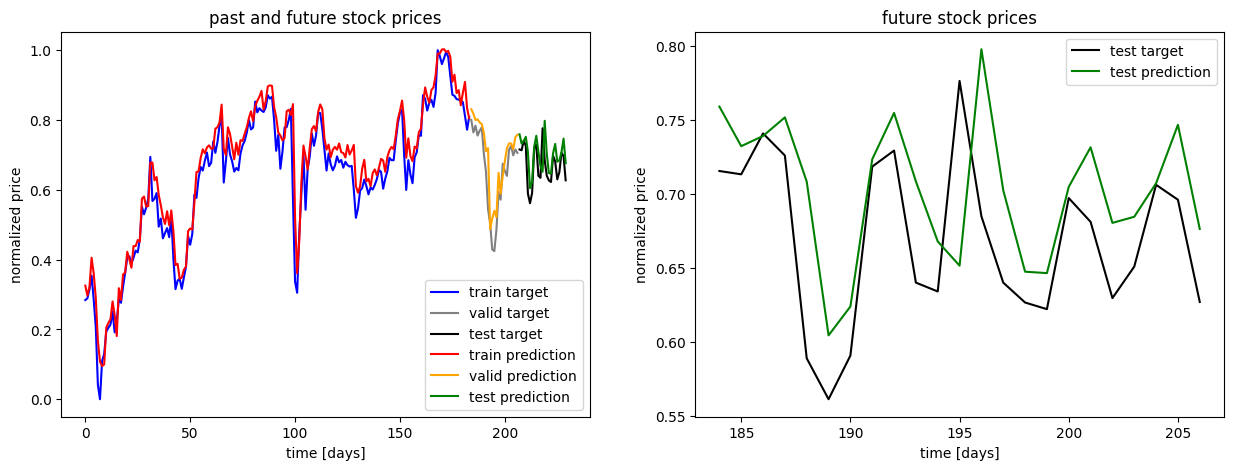

In [48]:
ft = 0 # 0 = open, 1 = close, 2 = highest, 3 = lowest

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,1]-y_train[:,0]),
            np.sign(y_train_pred[:,1]-y_train_pred[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,1]-y_valid[:,0]),
            np.sign(y_valid_pred[:,1]-y_valid_pred[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,1]-y_test[:,0]),
            np.sign(y_test_pred[:,1]-y_test_pred[:,0])).astype(int)) / y_test.shape[0]

print('correct sign prediction for close - open price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))

## Model Evaluation 

In [49]:
# Assuming that y_train, y_valid, y_test are the actual target values

# Calculate Mean Squared Error
mse_train = np.mean(np.square(y_train_pred - y_train))
mse_valid = np.mean(np.square(y_valid_pred - y_valid))
mse_test = np.mean(np.square(y_test_pred - y_test))

print('MSE Train: %.6f' % mse_train)
print('MSE Valid: %.6f' % mse_valid)
print('MSE Test: %.6f' % mse_test)

# Calculate Accuracy
def calculate_accuracy(predicted, actual):
    threshold = 0.5  # You may adjust the threshold based on your problem
    predicted_binary = (predicted > threshold).astype(int)
    actual_binary = actual.astype(int)
    accuracy = np.mean(np.equal(predicted_binary, actual_binary))
    return accuracy
# Lesser the MSE => smaller is the error => better the estimator.

MSE Train: 0.004524
MSE Valid: 0.005290
MSE Test: 0.004328
